In [1]:
import Ramsey_ExperimentV2
import estimator
import numpy as np

In [13]:
from tqdm import tqdm
import random

T = 6*np.pi
uni_delay = np.linspace(0, T, 40)
shots = 10000
errors_fisher = []
errors_local = []
uniform_local = []
n = 1
delay = [1]
fisher_delay = [0.44,1.78]

repetitions = 20
# W =]
W = np.linspace(0, 3, 13)
np.delete(W, 0)
Decay = [1]
J = []

for rep in range(repetitions):
    rep_error_fisher = []
    rep_error_local = []
    rep_error_uniform = []
    # W = [random.gauss(0, 3) for _ in range(n)]
    # Decay = [random.gauss(3, 1) for _ in range(n)]
    # J = [random.gauss(0, 3) for _ in range(n - 1)]
    for w in tqdm(W, desc=f"Repetition {rep}"):
        batch_x, batch_y = Ramsey_ExperimentV2.ramsey_global(n, shots, delay, Decay, [w], J)
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV2.ramsey_local(n, shots, delay, Decay,
                                                                                                  [w], J)

        batch_det, batch_cross = Ramsey_ExperimentV2.ramsey_local_X(n, shots, fisher_delay, Decay, [w], J)
        batch_uni_det, batch_uni_cross = Ramsey_ExperimentV2.ramsey_local_X(n, shots, uni_delay, Decay, W, J)

        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
                                                                 batch_y_cross)
        Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

        Decay_uni, W_uni, J_uni = estimator.one_by_one_X(batch_uni_det, batch_uni_cross)


        rep_error_fisher.append(estimator.percent_error(np.concatenate([Decay, [w], J]),
                                                        np.concatenate([Decay_fisher, W_fisher, J_fisher])))
        rep_error_local.append(estimator.percent_error(np.concatenate([Decay, [w], J]),
                                                       np.concatenate([Decay_local, W_local, J_local])))
        rep_error_uniform.append(estimator.percent_error(np.concatenate([Decay, [w], J]),
                                                         np.concatenate([Decay_uni, W_uni, J_uni])))

    errors_fisher.append(rep_error_fisher)
    errors_local.append(rep_error_local)
    uniform_local.append(rep_error_uniform)


Repetition 19: 100%|██████████| 13/13 [00:07<00:00,  1.66it/s]


In [14]:
errors_fisher_reshaped = list(map(list, zip(*errors_fisher)))
errors_fisher_median = [np.median(np.array(errors_fisher_reshaped[i])) for i in range(len(errors_fisher_reshaped))]
errors_fisher_std = [np.std(np.array(errors_fisher_reshaped[i])) for i in range(len(errors_fisher_reshaped))]

errors_local_reshaped = list(map(list, zip(*errors_local)))
errors_local_median = [np.median(np.array(errors_local_reshaped[i])) for i in range(len(errors_local_reshaped))]
errors_local_std = [np.std(np.array(errors_local_reshaped[i])) for i in range(len(errors_local_reshaped))]

errors_uniform_reshaped = list(map(list, zip(*uniform_local)))
errors_uniform_median = [np.median(np.array(errors_uniform_reshaped[i])) for i in range(len(errors_uniform_reshaped))]
errors_uniform_std = [np.std(np.array(errors_uniform_reshaped[i])) for i in range(len(errors_uniform_reshaped))]

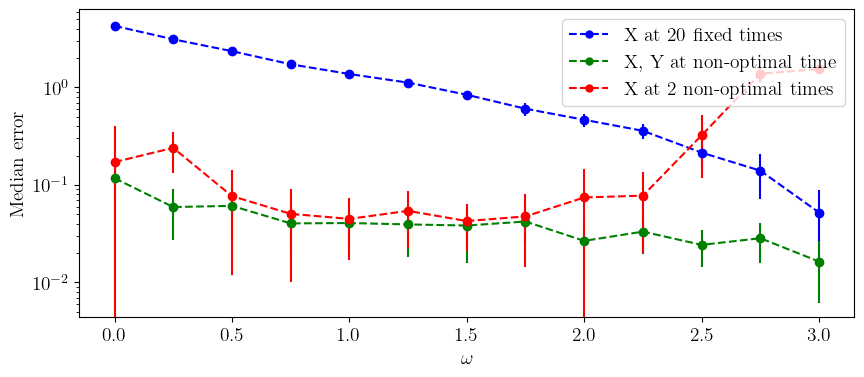

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)
plt.plot(W, errors_uniform_median, linestyle='--', marker='o', color='blue', markersize=5, label='X at 20 fixed times')
plt.plot(W, errors_local_median, linestyle='--', marker='o',  color='green', markersize=5, label='X, Y at non-optimal time')
plt.plot(W, errors_fisher_median, linestyle='--', marker='o',  color='red', markersize=5, label='X at 2 non-optimal times')

plt.errorbar(W, errors_uniform_median, yerr=errors_uniform_std, fmt='o', color='blue')
plt.errorbar(W, errors_local_median, yerr=errors_local_std, fmt='o', color='green')
plt.errorbar(W, errors_fisher_median, yerr=errors_fisher_std, fmt='o', color='red')

# plt.title(f'Shots={Decay} ')
plt.xlabel('$\omega$')
plt.ylabel('Median error')
plt.grid()
plt.yscale('log')
# plt.xscale('log')
plt.grid()
plt.legend()